# Linear Regression

## Single Feature Variable with Scikit-Learn Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # scikitlearn uses numpy arrays

data = pd.read_csv('LinRegData.csv') # Read in our data
data.head() # See the first few rows to understand the data

,X,Y
0,3.717656,2.969227
1,2.240286,2.674028
2,2.541955,3.532068
3,3.570501,3.636004
4,0.288653,2.125236


Text(0, 0.5, 'Y')

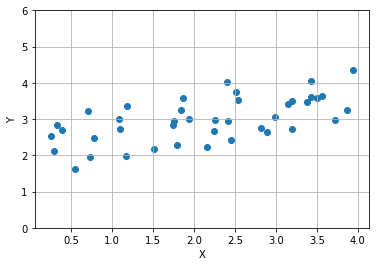

In [3]:
# Data is X and Y coordinates
X = data['X']
Y = data['Y']
plt.scatter(X, Y) # Plot 
plt.ylim([0,6])
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

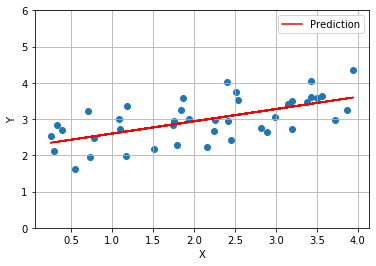

In [4]:
# Use scikitlearn to do linear regression
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()

x=X.values.reshape(-1,1) # LinearRegressor object wants arguments as numpy objects
y=Y.values.reshape(-1,1)
linearRegressor.fit(x, y)
y_pred = linearRegressor.predict(x)
plt.scatter(X, Y) # scatter plot, learning data
plt.plot(x, y_pred, 'red') # plot of linear regression prediction on top (red line)

#Plot formatting.
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.ylim([0,6]);
plt.legend(['Prediction'])

In [5]:
# Just try a single number
linearRegressor.predict([[3]])

array([[3.27684707]])

Root Mean Squared Error:

$MSE\ =\ \frac{1}{n}\sum_{i=1}^{n}\left({\hat{Y}}_i - Y_i\right)^2$

In [6]:
from sklearn.metrics import mean_squared_error # Sklearn library has this as a func for us.
mean_squared_error(y, y_pred)

0.23034812795839643

## Linear Regression Under the Hood

In [7]:
# Maky your own simple linear regression Gradient Descent
eta = 0.05  # Learning Rate 0.01
iterations = 100  # The number of iterations to perform 1e3
n = len(X) # Number of elements 
beta0, beta1 = 0, 0 # start with random numbers

# Performing Gradient Descent
for i in range(iterations): 
    beta0 = beta0 - eta * (2/n) * sum(beta0 + beta1 * X - Y)
    beta1 = beta1 - eta * (2/n) * sum((beta0 + beta1 * X - Y) * X)

print('Final values of Beta0 and Beta1 are:', beta0, beta1)

Y_pred = beta0 + beta1 * X # Do the prediction

Final values of Beta0 and Beta1 are: 2.0228762355020855 0.4283872160417386


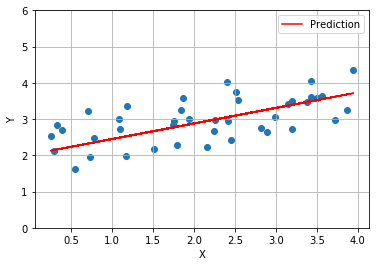

In [8]:
# Plotting
plt.scatter(X, Y) 
plt.plot(X, Y_pred, color='red')

# Formatting
plt.ylim([0,6])
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Prediction'])

In [9]:
mean_squared_error(Y, Y_pred)

0.2427170083979493

# Exercise 9 - Custom Linear Regression with 2 Feature Variables
Here we will take in 2 columns of stock fundamental data, as well as the past stock return, and try and predict returns

Some of the code is missing. Try and fix the code.

In [10]:
data = pd.read_csv('Exercise_9_StockReturnData.csv') # Read in our data
data.???() # Take a first look at the data with head

,Stock Performance,P/E,RoE
0,0.055388,10.875822,0.179792
1,0.112595,18.033607,0.143820
2,0.947340,-11.771037,-0.209845
3,0.032850,12.254908,5.000000
4,-0.015705,20.870461,0.040745


In [11]:
Y = data['Stock Performance'] # Split data into X and Y
X = data.??(columns=???) # get rid of the Stock Performance Column
X.shape # Get an idea of the size of X

(78, 2)

In [12]:
from sklearn.model_selection import train_test_split # Want to split test and train data
X_train, X_test, y_train, y_test = train_test_split(?, ?, test_size=0.2)

In [13]:
# Simple linear regression Gradient Descent
eta = 0.0002  # Learning Rate 0.0001
iterations = 1000  # The number of iterations to perform 1e3
n = len(X_train) # Number of elements 
beta0, beta1, beta2 = 0, 0, 0 # start with random numbers

# Manually setting X1 and X2. Could put regression into a function if you wish.
X1 = X_train['P/E']
X2 = X_train['RoE']

# Performing Gradient Descent
for i in range(iterations): 
    beta0 = beta0 - eta * (2/n) * sum(beta0 + beta1*X1 + beta2*X2 - y_train)
    beta1 = beta1 - eta * (2/n) * sum((beta0 + beta1*X1 + ??*X2 - y_train) * X1)
    beta2 = beta2 - eta * (2/???) * sum((beta0 + ??*X1 + beta2*X2 - ???) * ??)

Y_pred = beta0 + beta? * X1 + beta?? * X2 # Do the prediction
print('Final values of Beta0, Beta1 and Beta2 are:', beta0, beta1, beta2) # Make sure not crazy numbers

Final values of Beta0, Beta1 and Beta2 are: 0.041696299111480956 -0.0005628475848695432 0.024440039486909967


In [14]:
from sklearn.metrics import mean_squared_error
print('train error', mean_squared_error(y_train, Y_pred))
print('test error', mean_squared_error(y_test, beta0 + beta1 * X_test['P/E'] + beta2 * X_test['RoE']))

train error 0.15822271814428412
test error 0.22073504097291874


In [15]:
# The fit seems to work. Let's try a common-sense check to see if the algorithm is working.
# A stock with a ridiculously low P/E with a ridiculously high RoE should give us spectacular returns.
# Try P/E of 2 and a RoE of 150%
stock_return_pred = beta0 + beta1 * 2 + beta2 * 1.5
print('Predicted Stock Return P/E of 2 and RoE of 150% is:', stock_return_pred)

Predicted Stock Return P/E of 2 and RoE of 150% is: 0.07723066317210682


In [16]:
# 7% as a prediction kind of sucks, but it is at least positive.
# Try P/E of 100 and a RoE of 1%, this kind of stock should do badly.
stock_return_pred = beta0 + beta1 * 100 + beta2 * 0.01
print('Predicted Stock Return P/E of 2 and RoE of 150% is:', stock_return_pred)

Predicted Stock Return P/E of 2 and RoE of 150% is: -0.014344058980604266


In [17]:
# 2% return is quite low for a stock return.
X.shape # Let's see how big X is.
# Bear in mind that we have less than 100 rows of data to work with. 
# Our regression algorithm works in the right direction, we expect a low P/E stock with high RoE to perform better
# Also bear in mind that only beta0, 1 and 2 are changing, by their nature they will not capture many relationships in the data

(78, 2)

# Linear Regression Regularisation

In [32]:
data = pd.read_csv('Exercise_9_stock_data_performance_fundamentals.csv', index_col=0) # Read in our data
data

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,Perf
3400,6.381478,0.204089,10.875822,1.955389,1.043914,507.500000,1.683476,0.179792,0.205403,0.746217,2.340092,0.489970,1.896559,0.315558,0.055388
12853,13.063094,0.320015,18.033607,2.593587,2.290410,23.015477,2.739353,0.143820,0.143781,0.619297,2.614733,1.013029,4.911931,0.512353,0.112595
11564,22.946430,0.049592,-11.771037,2.470096,0.154558,0.518199,2.304271,-0.209845,0.043381,6.343013,1.157654,0.384641,9.211404,0.057980,0.947340
6584,9.117308,0.124919,12.254908,100.000000,0.406767,-200.000000,1.989239,5.000000,0.115158,100.000000,1.003977,0.179304,7.571732,0.082257,0.032850
2810,-41.561149,0.418362,20.870461,0.850370,1.098445,39.277419,1.379839,0.040745,0.039916,3.682290,1.271570,1.117836,26.533528,1.000000,-0.015705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,83.505399,-0.509146,-179.701327,4.152762,1.604563,0.875874,0.739027,-0.023109,0.016279,4.303501,1.232434,0.453732,7.999567,0.488284,0.619817
2151,15.319187,0.223177,22.101117,4.375731,1.225972,29.056159,0.643573,0.197987,0.187116,1.095606,1.912737,0.125216,2.354439,0.434046,0.193358
7622,11.633947,0.578705,19.023766,3.430473,3.802736,-200.000000,4.495777,0.180326,0.265560,0.154412,7.476183,1.687236,5.452243,0.593472,0.192087
3578,11.929398,1.061325,18.686352,2.997386,1.498863,6.799893,1.222132,0.160405,0.159912,1.318212,1.758603,0.207343,8.240939,0.412899,-0.170243


In [34]:
#data = pd.read_csv('Exercise_9_stock_data_performance_fundamentals.csv', index_col=0) # Read in our data
#from pandas.plotting import scatter_matrix # If want scatter matrix
#scatter_matrix(data, alpha=0.2, figsize=(10, 10))

In [35]:
X=data.drop(columns='Perf')
Y=data['Perf']
X.keys()

Index(['EV/EBIT', 'Op. In./(NWC+FA)', 'P/E', 'P/B', 'P/S',
       'Op. In./Interest Expense', 'Working Capital Ratio', 'RoE', 'ROCE',
       'Debt/Equity', 'Debt Ratio', 'Cash Ratio', 'Asset Turnover',
       'Gross Profit Margin'],
      dtype='object')

In [36]:
# Use scikitlearn to do linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linearRegressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, linearRegressor.predict(X_test)))


train error 0.12926017769660428
test error 3.8944563775967076


In [37]:
# Learning curve for any Regressor
def learningCurve(myModel, X, Y, randomState):
    testErr, trainErr, trainSize = [],[],[] # We will take these lists as output
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=randomState)
    trainSize = range(1, len(X))
    for i in trainSize:
        myModel.fit(X_train[:i], y_train[:i])
        y_pred = myModel.predict(X_train[:i])
        trainErr.append(mean_squared_error(y_train[:i], y_pred))
        testErr.append(mean_squared_error(y_test, myModel.predict(X_test)))
    return np.sqrt(testErr), np.sqrt(trainErr), trainSize
    

Text(0.5, 1.0, 'Random State of 123')

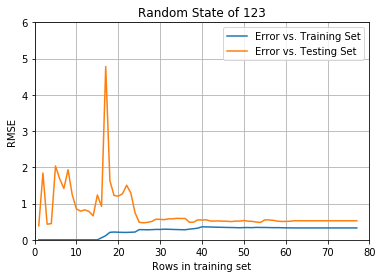

In [38]:
# Plotting the learning curve shows some interesting things.
randomState=123 # randomstate try 123 and 1234
testErr, trainErr, trainSize = learningCurve(linearRegressor, X, Y, randomState) 
plt.plot(trainSize, trainErr, trainSize, testErr) # plot
plt.legend(['Error vs. Training Set', 'Error vs. Testing Set']) # Formatting
plt.grid()
plt.xlabel('Rows in training set')
plt.ylabel('RMSE')
plt.ylim([0,6])
plt.xlim([0,80])
plt.title('Random State of {}'.format(randomState))

In [39]:
from sklearn.linear_model import Ridge
ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train, y_train)
y_pred = ridgeRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, ridgeRegressor.predict(X_test)))


train error 0.13257687481350078
test error 0.7523443835840322


In [25]:
from sklearn.linear_model import Lasso
lassoRegressor = Lasso(alpha=0.1)
lassoRegressor.fit(X_train, y_train)
y_pred = lassoRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, lassoRegressor.predict(X_test)))


train error 0.1463680986191252
test error 0.11575680599746771


In [26]:
from sklearn.linear_model import ElasticNet
eNetRegressor = ElasticNet(alpha=0.1, l1_ratio=0.5)
eNetRegressor.fit(X_train, y_train)
y_pred = eNetRegressor.predict(X_train)

print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, eNetRegressor.predict(X_test)))


train error 0.14422073247670292
test error 0.11922290010175587


##### Plot learning curves for regularised linear models

In [27]:
# Plotting the learning curve shows some interesting things.
randomState=42 # randomstate try 123 and 1234
testErr1, trainErr1, trainSize1 = learningCurve(linearRegressor, X, Y, randomState) 
testErr2, trainErr2, trainSize2 = learningCurve(ridgeRegressor, X, Y, randomState) 
testErr3, trainErr3, trainSize3 = learningCurve(lassoRegressor, X, Y, randomState) 
testErr4, trainErr4, trainSize4 = learningCurve(eNetRegressor, X, Y, randomState) 

C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
C:\Users\G50\miniconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


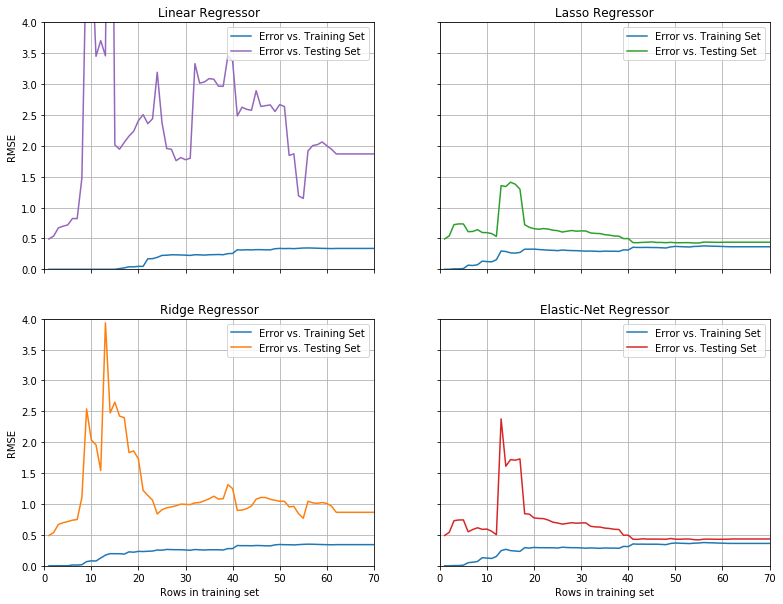

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(13,10))
axs[0, 0].plot(trainSize1, trainErr1, trainSize1, testErr1, 'tab:purple')
axs[0, 0].set_title("Linear Regressor")
axs[1, 0].plot(trainSize2, trainErr2, trainSize2, testErr2, 'tab:orange')
axs[1, 0].set_title("Ridge Regressor")
axs[0, 1].plot(trainSize3, trainErr3, trainSize3, testErr3, 'tab:green')
axs[0, 1].set_title("Lasso Regressor")
axs[1, 1].plot(trainSize4, trainErr4, trainSize4, testErr4, 'tab:red')
axs[1, 1].set_title("Elastic-Net Regressor")

for ax in axs.flat:
    ax.set(xlabel='Rows in training set', ylabel='RMSE', ylim=(0,4), xlim = (0,70))
    ax.grid()
    ax.legend(['Error vs. Training Set', 'Error vs. Testing Set'])
    
    # Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

| Regressor | RMSE vs. Training Data | RMSE vs. Testing Data |
| :- | :-: | :-: |
| Linear | 0.129 | 3.894
| Ridge | 0.133 | 0.752
| Lasso | 0.146 | 0.116
| Elastic-Net | 0.144 | 0.119